# Canola Diseases Prediction

* [Google Colab Notebook](https://colab.research.google.com/drive/1kzo5HvHWTKxtSEAw41BxTtj6rFKCMLG-?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/gregsvein55/canola-diseases)


# Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           3819        155  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           4002        139  1.0              
iamsouravbanerjee/world-population-dataset             World Population Dataset                          17KB  2022-08-27 08:29:18            306         45  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data               

In [ ]:
!kaggle datasets download -d gregsvein55/canola-diseases

!unzip /content/canola-diseases.zip

Archive:  /content/canola-diseases.zip
  inflating: testing/Diseased/test6.png  
  inflating: testing/Diseased/test8.png  
  inflating: testing/Healthy/test1.png  
  inflating: testing/Healthy/test2.png  
  inflating: training/training/Diseased/download (1).png  
  inflating: training/training/Diseased/download (10).png  
  inflating: training/training/Diseased/download (100).png  
  inflating: training/training/Diseased/download (11).png  
  inflating: training/training/Diseased/download (12).png  
  inflating: training/training/Diseased/download (13).png  
  inflating: training/training/Diseased/download (14).png  
  inflating: training/training/Diseased/download (15).png  
  inflating: training/training/Diseased/download (16).png  
  inflating: training/training/Diseased/download (17).png  
  inflating: training/training/Diseased/download (18).png  
  inflating: training/training/Diseased/download (19).png  
  inflating: training/training/Diseased/download (2).png  
  inflating: tra

In [ ]:
IMAGE_DIR = "/content/training/training"

In [ ]:
# Create a list of all the class names
import os

class_names = sorted(os.listdir(IMAGE_DIR))
class_names

['Diseased', 'Healthy']

# Split into train, test and validation data (using [splitfolders](https://pypi.org/project/split-folders/))

In [ ]:
!pip install split-folders

import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting the data into 3 datasets:**
* 70% in training dataset
* 20% in validation dataset
* 10% in testing dataset

In [ ]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 640 files [00:00, 8005.69 files/s]


In [ ]:
# Defining the training, validation and testing directories
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

# View images in training dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)), 0)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
    

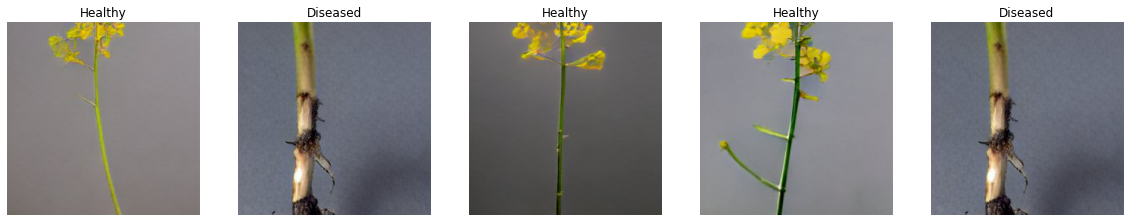

In [ ]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images. Also performing data augmentation.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255., 
                                 rotation_range=0.2, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255., 
                                  rotation_range=0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True)

Creating training, validation and testing data

In [ ]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="binary")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 447 images belonging to 2 classes.
Found 127 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


# Creating a basic model

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [34]:
history_1 = model_1.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
14/14 [==============================] - 6s 468ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 2/20
14/14 [==============================] - 8s 585ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 3/20
14/14 [==============================] - 6s 440ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 4/20
14/14 [==============================] - 6s 435ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 5/20
14/14 [==============================] - 6s 437ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 6/20
14/14 [==============================] - 6s 436ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 7/20
14/14 [==============================] - 6s 443ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 

## Plot the curves

In [35]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


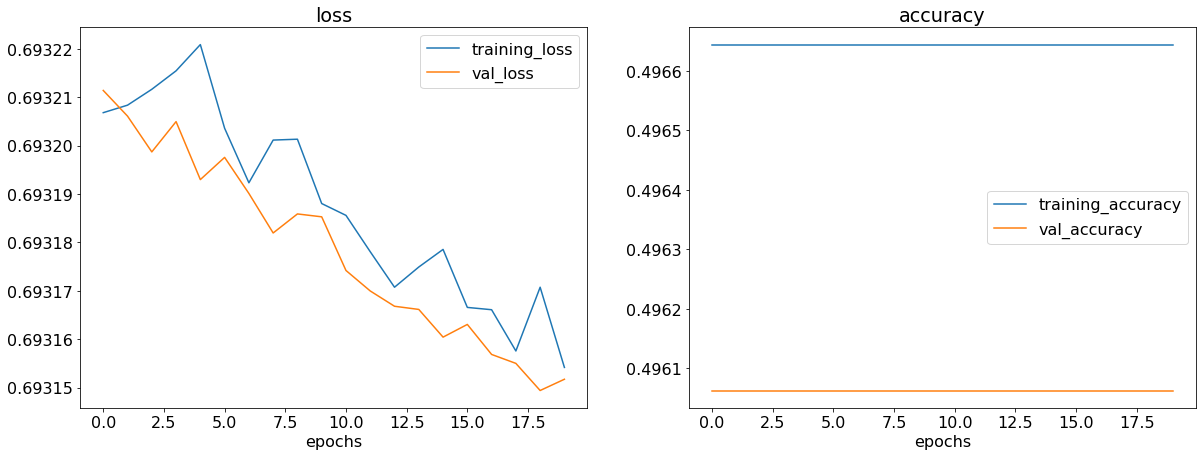

In [36]:
plot_curves(history_1)

## Get predictions on testing data

In [37]:
model_1.evaluate(test_data)

3/3 [==============================] - 1s 183ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473016738892, 0.5]

## Save the model

In [38]:
model_1.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Canola Diseases Prediction models/model_1.h5")

# Improving the model (Adding Convolutional Layers)

In [31]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [33]:
history_2 = model_2.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
14/14 [==============================] - 19s 501ms/step - loss: 1.3014 - accuracy: 0.5123 - val_loss: 0.6740 - val_accuracy: 0.6299
Epoch 2/20
14/14 [==============================] - 7s 471ms/step - loss: 0.5855 - accuracy: 0.6510 - val_loss: 0.3421 - val_accuracy: 0.8819
Epoch 3/20
14/14 [==============================] - 7s 474ms/step - loss: 0.3624 - accuracy: 0.8770 - val_loss: 0.2528 - val_accuracy: 0.9055
Epoch 4/20
14/14 [==============================] - 7s 470ms/step - loss: 0.3074 - accuracy: 0.8814 - val_loss: 0.1880 - val_accuracy: 0.9370
Epoch 5/20
14/14 [==============================] - 7s 471ms/step - loss: 0.2339 - accuracy: 0.9306 - val_loss: 0.1799 - val_accuracy: 0.9134
Epoch 6/20
14/14 [==============================] - 7s 475ms/step - loss: 0.1494 - accuracy: 0.9575 - val_loss: 0.1204 - val_accuracy: 0.9764
Epoch 7/20
14/14 [==============================] - 7s 474ms/step - loss: 0.2096 - accuracy: 0.9195 - val_loss: 0.2184 - val_accuracy: 0.8898
Epoch

## Plot the curves

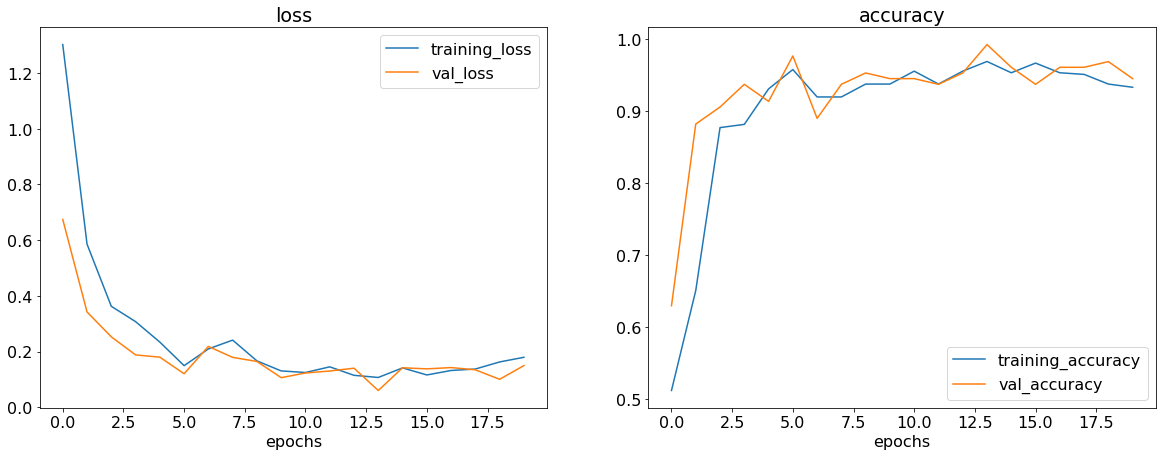

In [39]:
plot_curves(history_2)

## Get predictions on testing data

In [40]:
model_2.evaluate(test_data)

3/3 [==============================] - 1s 255ms/step - loss: 0.1815 - accuracy: 0.9545


[0.18149639666080475, 0.9545454382896423]

## Save the model

In [41]:
model_2.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Canola Diseases Prediction models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [42]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

## Train the model

In [44]:
history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
14/14 [==============================] - 7s 473ms/step - loss: 0.6718 - accuracy: 0.5011 - val_loss: 0.6077 - val_accuracy: 0.4961
Epoch 2/20
14/14 [==============================] - 6s 446ms/step - loss: 0.5809 - accuracy: 0.5347 - val_loss: 0.5130 - val_accuracy: 0.6614
Epoch 3/20
14/14 [==============================] - 6s 446ms/step - loss: 0.5161 - accuracy: 0.6667 - val_loss: 0.4606 - val_accuracy: 0.6772
Epoch 4/20
14/14 [==============================] - 6s 445ms/step - loss: 0.4946 - accuracy: 0.7517 - val_loss: 0.4477 - val_accuracy: 0.8110
Epoch 5/20
14/14 [==============================] - 8s 588ms/step - loss: 0.4707 - accuracy: 0.7517 - val_loss: 0.4477 - val_accuracy: 0.8346
Epoch 6/20
14/14 [==============================] - 6s 447ms/step - loss: 0.4548 - accuracy: 0.8412 - val_loss: 0.3580 - val_accuracy: 0.8898
Epoch 7/20
14/14 [==============================] - 6s 446ms/step - loss: 0.3399 - accuracy: 0.8837 - val_loss: 0.1918 - val_accuracy: 0.9685
Epoch 

## Plot the curves

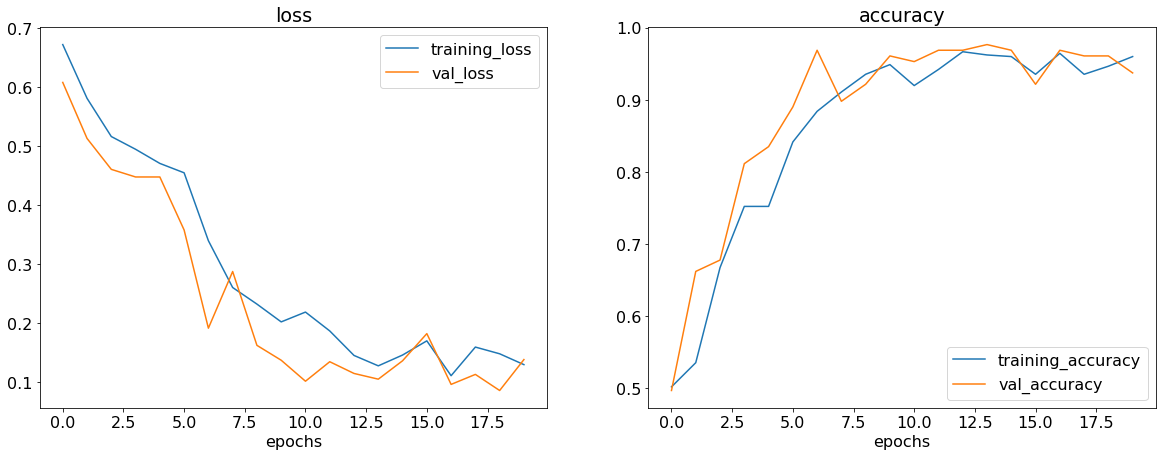

In [45]:
plot_curves(history_3)

## Get predictions on testing data

In [46]:
model_3.evaluate(test_data)

3/3 [==============================] - 1s 203ms/step - loss: 0.1592 - accuracy: 0.9394


[0.1592402309179306, 0.939393937587738]

## Save the model

In [47]:
model_3.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Canola Diseases Prediction models/model_3.h5")

# Transfer Learning

In [48]:
import tensorflow_hub as hub

In [49]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [50]:
model_4 = tf.keras.models.Sequential([
    hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224)+(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')                                  
    ])

model_4.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [51]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [52]:
history_4 = model_4.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
14/14 [==============================] - 12s 583ms/step - loss: 0.2668 - accuracy: 0.9217 - val_loss: 0.1202 - val_accuracy: 0.9606
Epoch 2/20
14/14 [==============================] - 7s 483ms/step - loss: 0.0942 - accuracy: 0.9732 - val_loss: 0.0811 - val_accuracy: 0.9843
Epoch 3/20
14/14 [==============================] - 7s 484ms/step - loss: 0.0536 - accuracy: 0.9911 - val_loss: 0.0550 - val_accuracy: 0.9764
Epoch 4/20
14/14 [==============================] - 7s 481ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 5/20
14/14 [==============================] - 9s 624ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0475 - val_accuracy: 0.9843
Epoch 6/20
14/14 [==============================] - 7s 485ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.0391 - val_accuracy: 0.9843
Epoch 7/20
14/14 [==============================] - 7s 490ms/step - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0310 - val_accuracy: 0.9843
Epoch

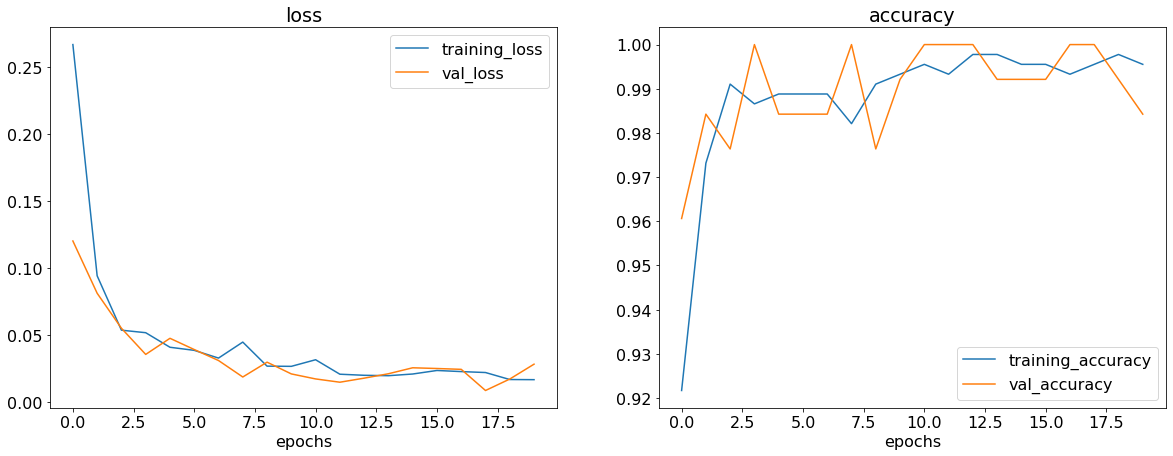

In [53]:
plot_curves(history_4)

In [54]:
model_4.evaluate(test_data)

3/3 [==============================] - 1s 477ms/step - loss: 0.0256 - accuracy: 1.0000


[0.025637192651629448, 1.0]

In [55]:
model_4.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Canola Diseases Prediction models/model_4.h5")

# Predict a random image from testing dataset

In [56]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [57]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

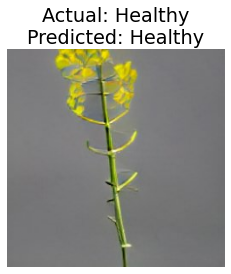

In [59]:
pred_random_image(model_4, TEST_DIR, class_names)